<a href="https://colab.research.google.com/github/DomenicoArmillotta/Symbolic_project-Hybrid_NA_DNN/blob/main/Symbolic_project_Hybrid_NA_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#input
# Dati di input
data = np.array([[0, 2.5584],
                 [0.5000, 2.6882],
                 [1.0000, 2.9627],
                 [1.5000, 3.2608],
                 [2.0000, 3.6235],
                 [2.5000, 3.9376],
                 [3.0000, 4.0383],
                 [3.5000, 4.1570],
                 [4.0000, 4.8498],
                 [4.5000, 4.6561],
                 [5.0000, 4.5119],
                 [5.5000, 4.8346],
                 [6.0000, 5.6039],
                 [6.5000, 5.5890],
                 [7.0000, 6.1914],
                 [7.5000, 5.8966],
                 [8.0000, 6.3866],
                 [8.5000, 6.6909],
                 [9.0000, 6.5224],
                 [9.5000, 7.1803],
                 [10.0000, 7.2537]])

x = data[:, 0]
y = data[:, 1]
l = len(x)


#Standard Linear Regression

In [ ]:
# Preparazione dei dati
x_train = torch.tensor(data[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data[:, 1], dtype=torch.float32).unsqueeze(1)

In [ ]:

# Definizione della rete neurale
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 64)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.output = nn.Linear(64, 1)  # Output layer con 1 neurone

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Creazione della rete neurale
net = NeuralNet()



In [ ]:
# Definizione di funzione di perdita e ottimizzatore
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Addestramento della rete neurale
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Azzeramento dei gradienti
    outputs = net(x_train)  # Calcolo delle predizioni
    loss = criterion(outputs, y_train)  # Calcolo della perdita
    loss.backward()  # Calcolo dei gradienti
    optimizer.step()  # Aggiornamento dei pesi

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

Epoch 100/1000, Loss: 0.0823
Epoch 200/1000, Loss: 0.0617
Epoch 300/1000, Loss: 0.0488
Epoch 400/1000, Loss: 0.0456
Epoch 500/1000, Loss: 0.0441
Epoch 600/1000, Loss: 0.0429
Epoch 700/1000, Loss: 0.0415
Epoch 800/1000, Loss: 0.0394
Epoch 900/1000, Loss: 0.0381
Epoch 1000/1000, Loss: 0.0374


In [ ]:
# Valutazione della rete neurale
net.eval()
with torch.no_grad():
    predicted = net(x_train)

# Stampa dei risultati
print(f'Predicted:\n{predicted.squeeze().numpy()}')
print(f'Ground Truth:\n{y_train.squeeze().numpy()}')

Predicted:
[2.4926713 2.7431562 3.0703638 3.4035878 3.5879216 3.7997139 4.0115056
 4.223298  4.43509   4.646882  4.858674  5.077204  5.3283415 5.5794783
 5.830615  6.081752  6.332888  6.584025  6.8351617 7.0862985 7.3374352]
Ground Truth:
[2.5584 2.6882 2.9627 3.2608 3.6235 3.9376 4.0383 4.157  4.8498 4.6561
 4.5119 4.8346 5.6039 5.589  6.1914 5.8966 6.3866 6.6909 6.5224 7.1803
 7.2537]


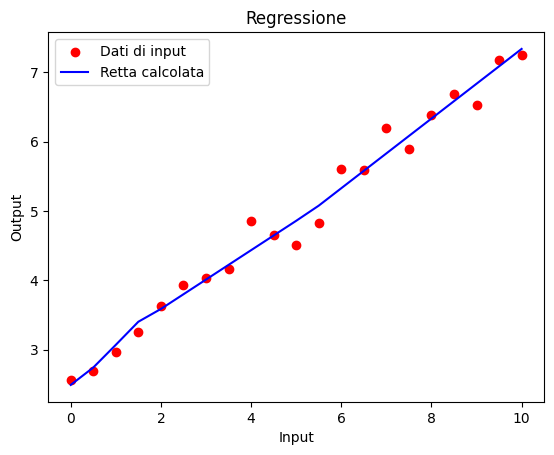

In [ ]:
import matplotlib.pyplot as plt

# Tracciamento del plot
plt.scatter(data[:, 0], data[:, 1], color='red', label='Dati di input')
plt.plot(x_train.numpy(), predicted.numpy(), color='blue', label='Retta calcolata')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Regressione')
plt.legend()
plt.show()


#NA LINEAR REGRESSION

Note :

Cosa serve **unsqueeze** :

Questa operazione è necessaria nel contesto del custom layer per garantire che le dimensioni dei tensori siano compatibili durante la moltiplicazione tra i pesi e i valori di input. I pesi hanno una forma di (1, input_size), mentre il tensore x[:, 0] ha una forma di (batch_size, 1). Pertanto, la forma dei due tensori sarà compatibile per la moltiplicazione elemento per elemento.

In [ ]:
#custom layer
#batch size = 1
#input size = 10 se il mio hidden layer ha 10 neuroni
class CustomNASingleNeuronLayer(nn.Module):
    def __init__(self, input_size):
        super(CustomNASingleNeuronLayer, self).__init__()
        self.weight1 = nn.Parameter(torch.randn(1, input_size))
        self.weight2 = nn.Parameter(torch.randn(1, input_size))
        self.weight3 = nn.Parameter(torch.randn(1, input_size))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        output = x[:, 0].unsqueeze(1) * self.weight1 + x[:, 1].unsqueeze(1) * self.weight2 + x[:, 2].unsqueeze(1) * self.weight3 + self.bias
        return output

In [48]:
#definizione della dnn con il layer custom
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.custom_layer = CustomNASingleNeuronLayer(10)  # Custom layer come output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.custom_layer(x)  # Passaggio attraverso il custom layer
        return x

# Creazione della rete neurale
net = NeuralNet()


## Visualization of custom layer

In [ ]:
pip install torchviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=dd030ae5c16b6cf328536a8d930697d168e15a9090f910660825a6b7c30e77bd
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import torch
from torchviz import make_dot
from google.colab import drive
from matplotlib import pyplot as plt


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torchviz import make_dot

# Definisci un esempio di input
input_size = 10
x = torch.randn(1, input_size)

# Crea il layer personalizzato
layer = CustomNASingleNeuronLayer(input_size)

# Calcola l'output del layer
output = layer(x)

# Crea il grafo e visualizzalo
dot = make_dot(output, params=dict(layer.named_parameters()))
dot.render('/content/drive/MyDrive/symbolic_custom_layer/custom_layer_graph.png')  # Salva il grafo come immagine


'/content/drive/MyDrive/symbolic_custom_layer/custom_layer_graph.png.pdf'